### CCO50- Digital Speech Processing  
# Short Test 3

**Description:** Design a FIR filter $h[n]$ of order $M = 5$ to allow for frequencies up to 1500 Hz to pass through, assuming that the input signal to be filtered $x[n]$ was sampled at 12000 samples per second. Considering, as an example, that $x[n]=(-1,1,-2,2,2)$, filter it by using $h[n]$, obtaining the output signal.

$$
h[n] = \frac{\sin{(\omega_c (n - \frac{M}{2}))}}{\pi (n - \frac{M}{2})}
\\\\
M = 5
\\\\ 
0 \leq n \leq 5
\\\\
\pi = 6kHz
\\\\
\omega_c = 1,5kHz = \frac{\pi}{4}
\\\\\\
$$

Calculando cada index de h:
$$
h[0] = \frac{\sin{(\frac{\pi}{4} (0 - \frac{5}{2}))}}{\pi (0 - \frac{5}{2})} = 0,11763192
\\
h[1] = \frac{\sin{(\frac{\pi}{4} (1 - \frac{5}{2}))}}{\pi (1 - \frac{5}{2})} = 0,19605321
\\
h[2] = \frac{\sin{(\frac{\pi}{4} (2 - \frac{5}{2}))}}{\pi (2 - \frac{5}{2})} = 0,243623839
\\
h[3] = \frac{\sin{(\frac{\pi}{4} (3 - \frac{5}{2}))}}{\pi (3 - \frac{5}{2})} = 0,243623839
\\
h[4] = \frac{\sin{(\frac{\pi}{4} (4 - \frac{5}{2}))}}{\pi (4 - \frac{5}{2})} = 0,196053321
\\
h[5] = \frac{\sin{(\frac{\pi}{4} (5 - \frac{5}{2}))}}{\pi (5 - \frac{5}{2})} = 0,11763192

$$

$$
h = (0.117, 0.196, 0.243, 0.243, 0.196, 0.117)

com o $h$ obtido, aplicar o filtro a $x = (-1, 1, -2, 2, 2)$

$$ x * h = (-0.117, -0.078, -0.282, -0.156, 0.187, 0.470, 0.700, 0.644, 0.627, 0.235) $$

In [1]:
import numpy as np

**Plus:** implementing the filter in python

In [45]:
def low_pass_filter(cutoff, sample_rate, M=5):
    nyq = sample_rate / 2
    omega = cutoff / nyq
    h = np.zeros(M+1)
    for n in range(M+1):
        if n == (M/2):
            h[n] = 1.0
        else:
            h[n] = (np.sin(np.pi * omega * (n - (M/2)))/(np.pi * (n - (M/2))))
    return h

In [3]:
h = low_pass_filter(1500, 12000, M=5)
print(h)

[0.117632   0.19605333 0.24362384 0.24362384 0.19605333 0.117632  ]


using the `discrete_time_convolution` method defined in ST2

In [4]:
def discrete_time_convolution(k, x):
    n = len(k)
    m = len(x)
    y = [0] * (m + n - 1)

    for i in range(m):
        for j in range(n):
            y[i + j] += x[i] * k[j]

    return y

In [24]:
x = [-1, 1, -2, 2, 2]
print(discrete_time_convolution(h, x))

[-0.11763199553648057, -0.07842133035765372, -0.282834504779935, -0.15684266071530745, 0.18769347736598724, 0.47052798214592234, 0.7000207021526447, 0.6440903399175237, 0.6273706428612298, 0.23526399107296114]


## Extra
### Generating waves and filtering them


In [6]:
import numpy as np
import pyaudio
import matplotlib.pyplot as plt


In [7]:
# defining a function to play the signal
def play_signal(signal, sample_rate=44100):
    p = pyaudio.PyAudio()

    stream = p.open(format=pyaudio.paFloat32,
                    channels=1,
                    rate=sample_rate,
                    output=True)

    stream.write(signal.tobytes())

    stream.stop_stream()
    stream.close()

    p.terminate()

In [8]:
# defining a function to see the signal
def plot_waveform(wave, label, title):
    plt.figure(figsize=(10, 4))
    plt.plot(wave, label=label)
    plt.title(title)
    plt.xlabel("Sample Index")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.grid()
    plt.show()

In [35]:
# generating a Am7 chord waves
sample_rate = 392*4
seconds = 2
octave = 1 # 1 for central octave, to lower pitch use 1/octave
s_A = (np.sin(2 * np.pi * np.arange(sample_rate * seconds) * 440 * octave / sample_rate)).astype(np.float32)
s_C = (np.sin(2 * np.pi * np.arange(sample_rate * seconds) * 256.63 * octave / sample_rate)).astype(np.float32)
s_E = (np.sin(2 * np.pi * np.arange(sample_rate * seconds) * 329.63 * octave / sample_rate)).astype(np.float32)
s_G = (np.sin(2 * np.pi * np.arange(sample_rate * seconds) * 392 * octave / sample_rate)).astype(np.float32)
s_Am7 = s_A + s_C + s_E + s_G
s_Am7 /= np.max(np.abs(s_Am7))  # Normalize the signal

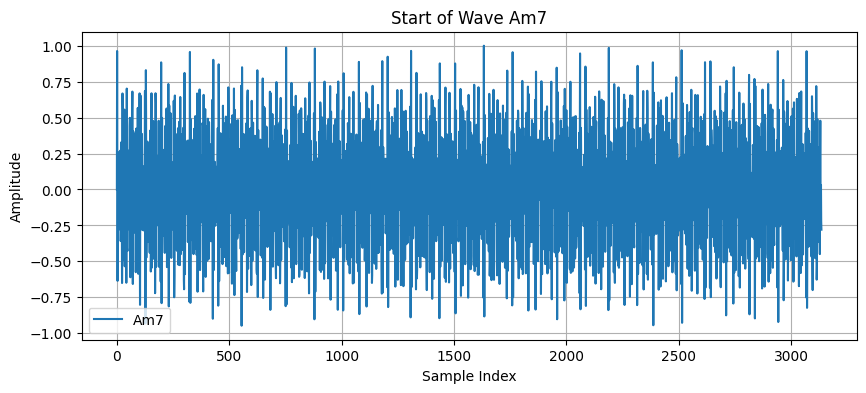

In [41]:
plot_waveform(s_Am7, "Am7", "Start of Wave Am7")

In [42]:
play_signal(s_Am7 * 0.5, sample_rate=sample_rate)

### Analyzing the spectogram

In [12]:
# defining a function to see the spectrogram
def plot_spectrogram(signal, title):
    plt.figure(figsize=(10, 4))
    plt.specgram(signal, Fs=sample_rate, NFFT=1024, noverlap=512, cmap='viridis')
    plt.title(title)
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")
    plt.colorbar(label='Intensity (dB)')
    plt.show()

In [13]:
def plot_fft(signal, title):
    plt.figure(figsize=(10, 4))
    plt.magnitude_spectrum(signal, Fs=sample_rate, scale='dB', color='C1')
    plt.title(title)
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude (dB)")
    plt.grid()
    plt.show()

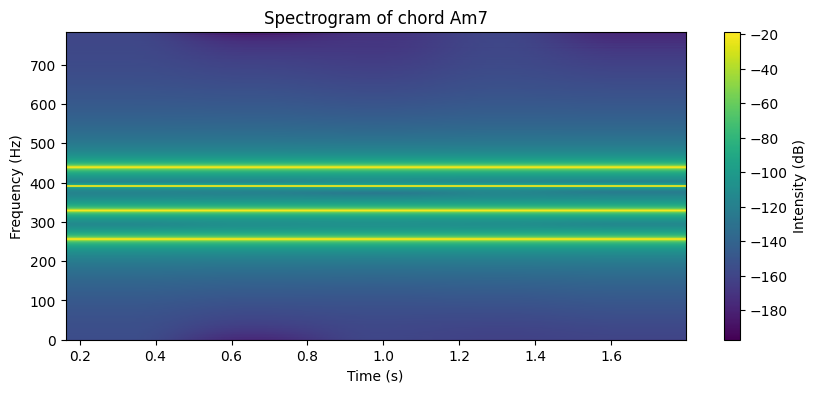

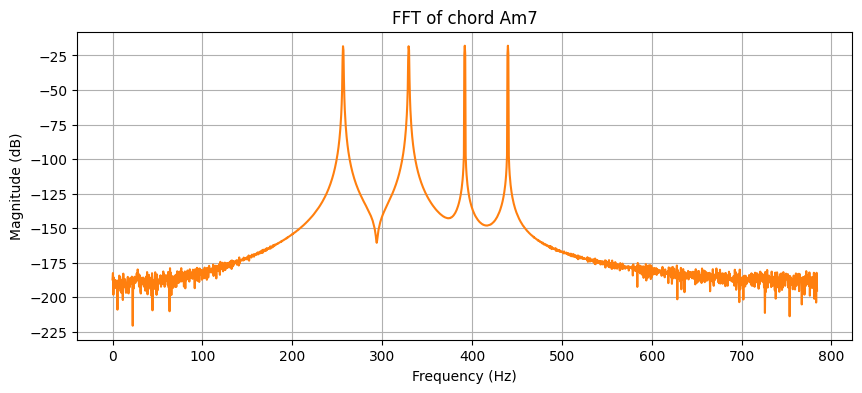

In [39]:
plot_spectrogram(s_Am7, "Spectrogram of chord Am7")
plot_fft(s_Am7, "FFT of chord Am7")

As seen in the Spectogram of the not filtered wave, there are peaks of energy for some lower frequencies, that are the harmonics in the chord, and a lot of variation in the rest.

### Creating a low pass filter
Lets filter up to 3kHz, changing the M

In [54]:

h_M5 = low_pass_filter(300, sample_rate, M=5)
h_m50 = low_pass_filter(300, sample_rate, M=51)
h_m500 = low_pass_filter(300, sample_rate, M=501)
h_m5000 = low_pass_filter(300, sample_rate, M=5001)

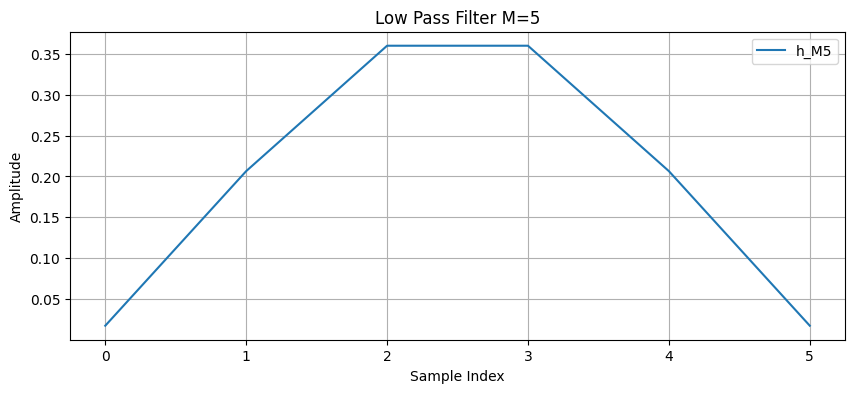

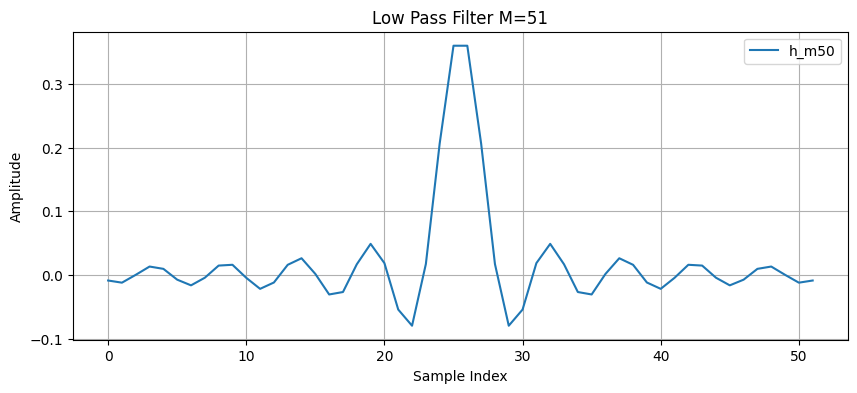

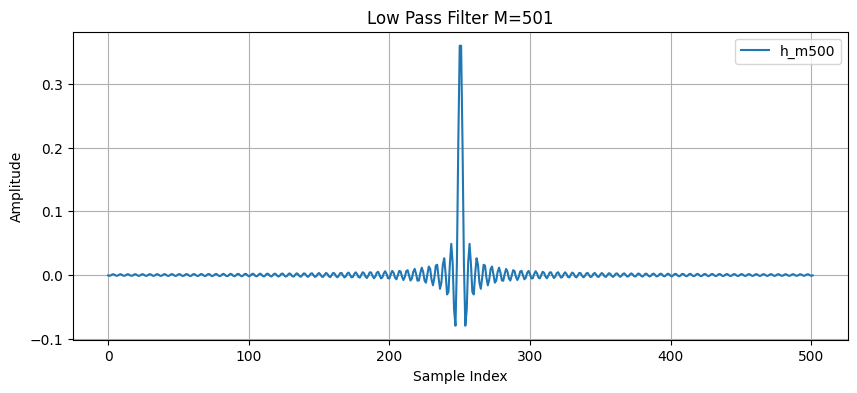

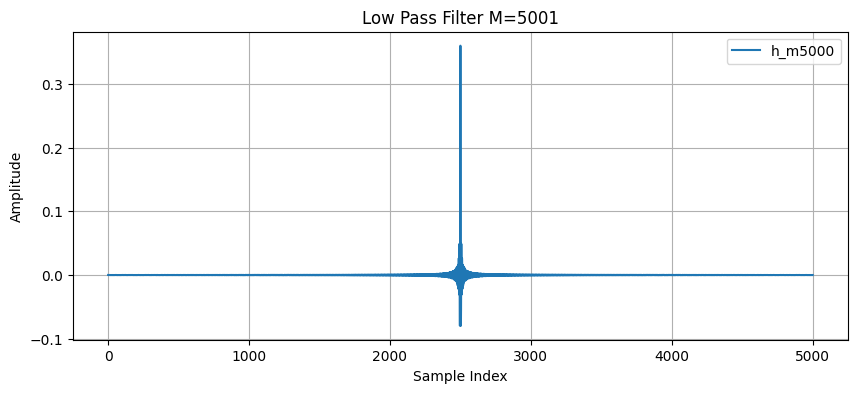

In [55]:
plot_waveform(h_M5, "h_M5", "Low Pass Filter M=5")
plot_waveform(h_m50, "h_m50", "Low Pass Filter M=51")
plot_waveform(h_m500, "h_m500", "Low Pass Filter M=501")
plot_waveform(h_m5000, "h_m5000", "Low Pass Filter M=5001")


In [56]:
s_Am7_filtered_M5 = np.convolve(h_M5, s_Am7)
s_Am7_filtered_m50 = np.convolve(h_m50, s_Am7)
s_Am7_filtered_m500 = np.convolve(h_m500, s_Am7)
s_Am7_filtered_m5000 = np.convolve(h_m5000, s_Am7)

#normalize the filtered signals
print("Max value before normalization:")
print("M5:", np.max(np.abs(s_Am7_filtered_M5)))
print("m50:", np.max(np.abs(s_Am7_filtered_m50)))
print("m500:", np.max(np.abs(s_Am7_filtered_m500)))
print("m5000:", np.max(np.abs(s_Am7_filtered_m5000)))


s_Am7_filtered_M5 = s_Am7_filtered_M5 / np.max(np.abs(s_Am7_filtered_M5))
s_Am7_filtered_m50 = s_Am7_filtered_m50 / np.max(np.abs(s_Am7_filtered_m50))
s_Am7_filtered_m500 = s_Am7_filtered_m500 / np.max(np.abs(s_Am7_filtered_m500))
s_Am7_filtered_m5000 = s_Am7_filtered_m5000 / np.max(np.abs(s_Am7_filtered_m5000))

print("Max value after normalization:")
print("M5:", np.max(np.abs(s_Am7_filtered_M5)))
print("m50:", np.max(np.abs(s_Am7_filtered_m50)))
print("m500:", np.max(np.abs(s_Am7_filtered_m500)))
print("m5000:", np.max(np.abs(s_Am7_filtered_m5000)))

Max value before normalization:
M5: 0.3874071965065256
m50: 0.3557318747782282
m500: 0.3656121334118924
m5000: 0.36797167787484414
Max value after normalization:
M5: 1.0
m50: 1.0
m500: 1.0
m5000: 1.0


In [57]:
play_signal(s_Am7_filtered_M5, sample_rate=sample_rate)
play_signal(s_Am7_filtered_m50, sample_rate=sample_rate)
play_signal(s_Am7_filtered_m500, sample_rate=sample_rate)
play_signal(s_Am7_filtered_m5000, sample_rate=sample_rate)

I really dont know what I did wrong, but ir didn`t work as I expected, so much noise and so loud! but the signal is normalized, even when multiplying by a very small factor to lower the amplitude, the signal still is loud.

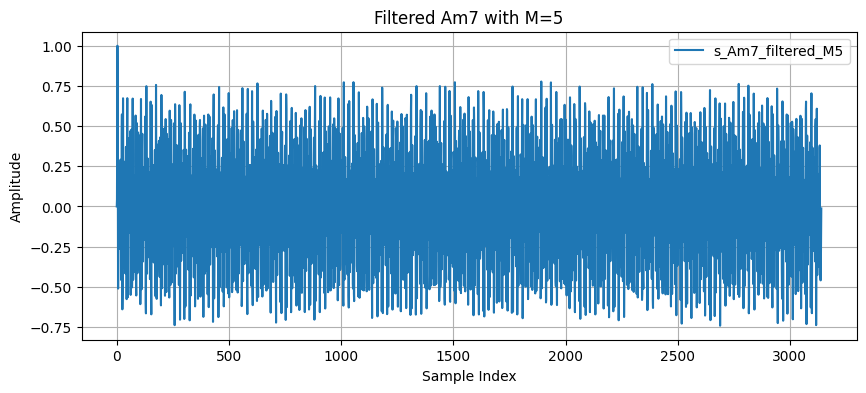

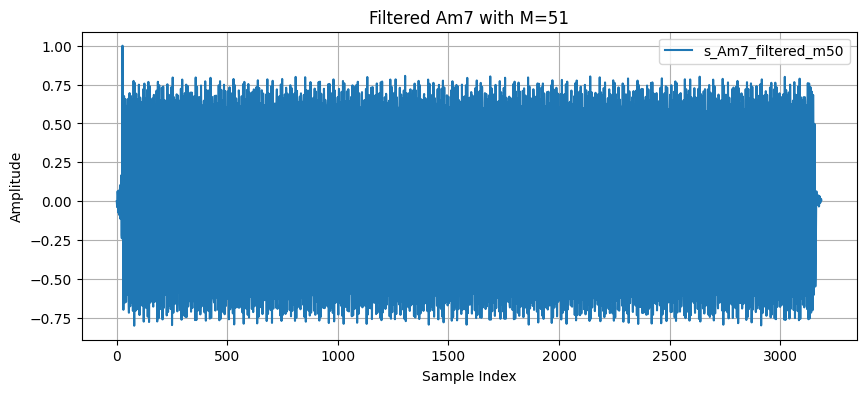

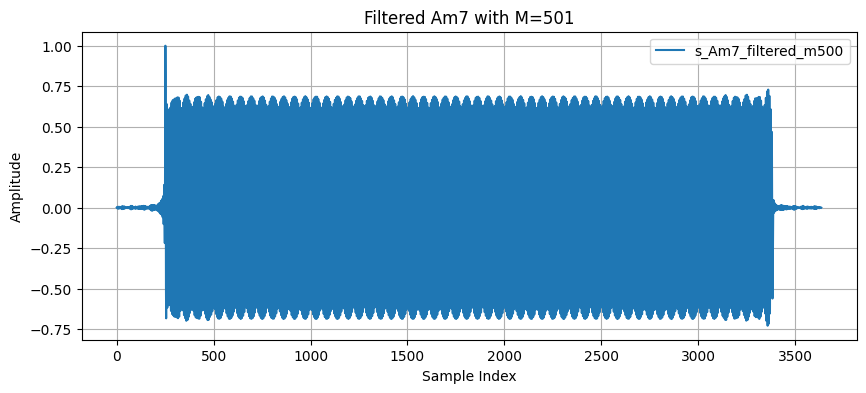

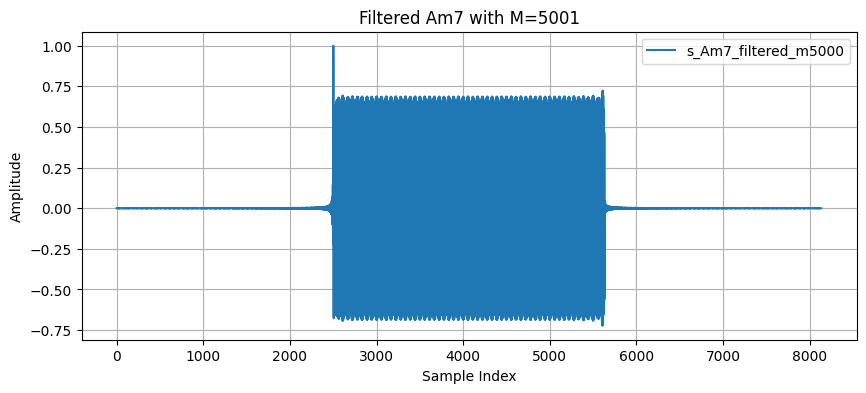

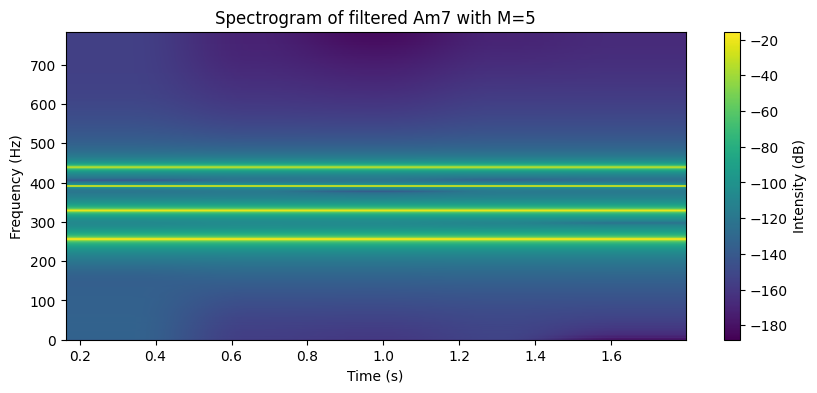

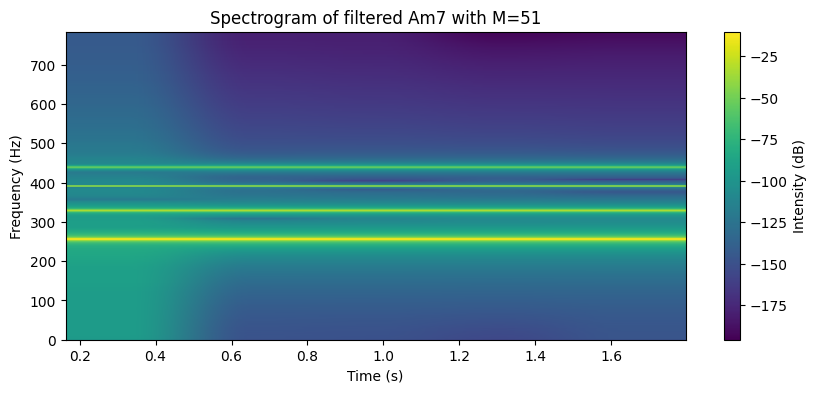

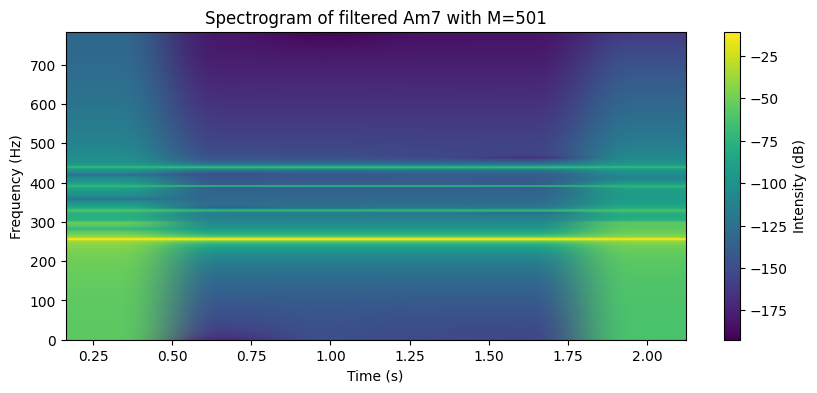

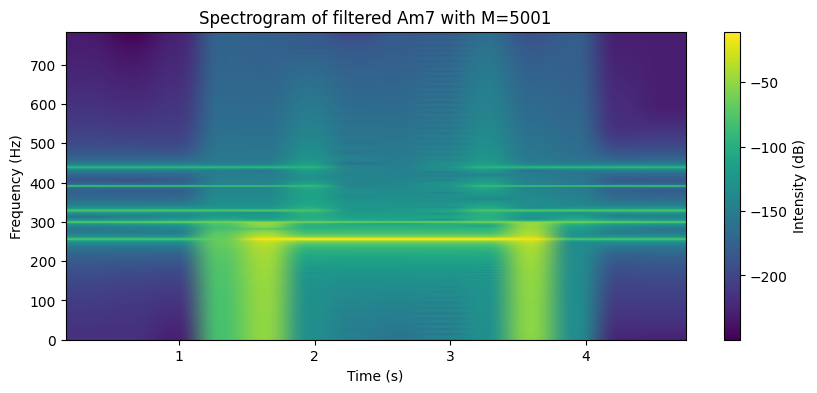

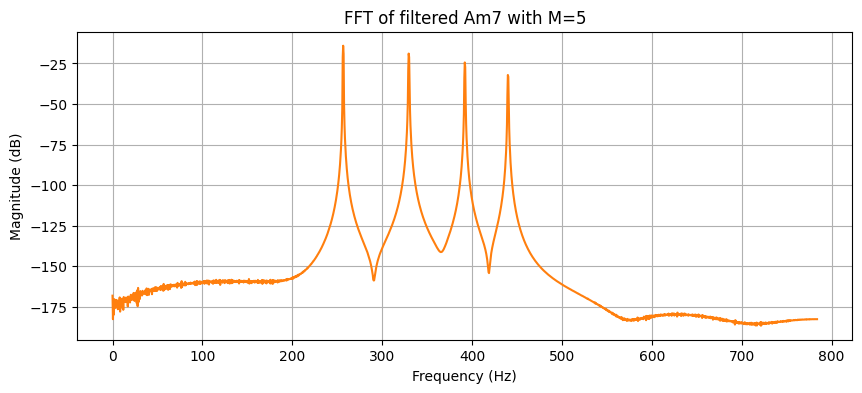

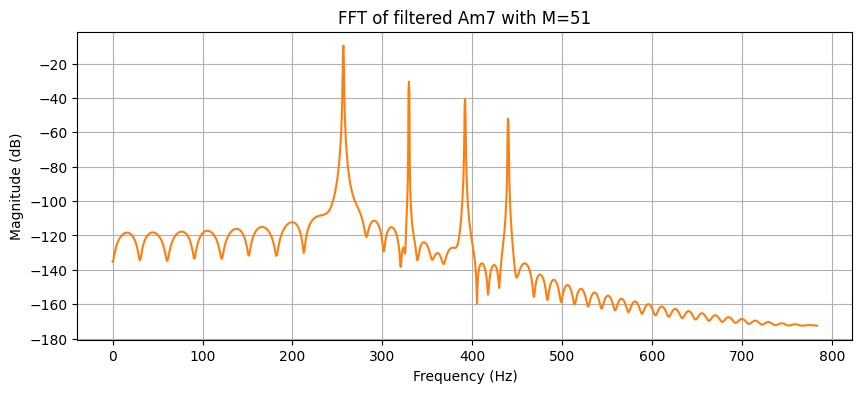

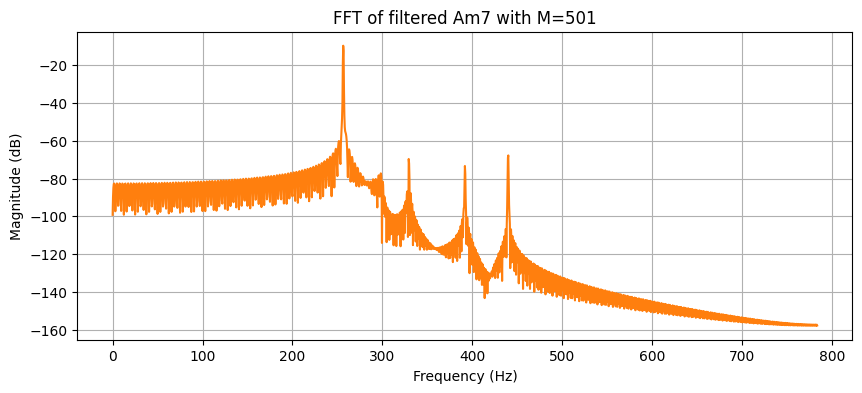

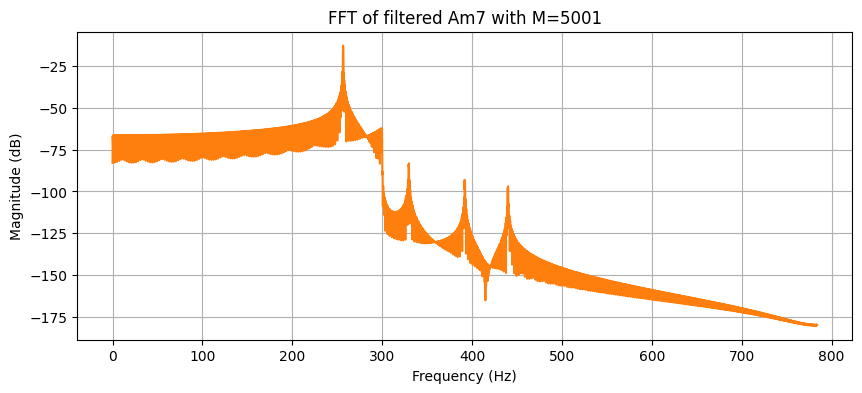

In [59]:
plot_waveform(s_Am7_filtered_M5, "s_Am7_filtered_M5", "Filtered Am7 with M=5")
plot_waveform(s_Am7_filtered_m50, "s_Am7_filtered_m50", "Filtered Am7 with M=51")
plot_waveform(s_Am7_filtered_m500, "s_Am7_filtered_m500", "Filtered Am7 with M=501")
plot_waveform(s_Am7_filtered_m5000, "s_Am7_filtered_m5000", "Filtered Am7 with M=5001")
plot_spectrogram(s_Am7_filtered_M5, "Spectrogram of filtered Am7 with M=5")
plot_spectrogram(s_Am7_filtered_m50, "Spectrogram of filtered Am7 with M=51")
plot_spectrogram(s_Am7_filtered_m500, "Spectrogram of filtered Am7 with M=501")
plot_spectrogram(s_Am7_filtered_m5000, "Spectrogram of filtered Am7 with M=5001")
plot_fft(s_Am7_filtered_M5, "FFT of filtered Am7 with M=5")
plot_fft(s_Am7_filtered_m50, "FFT of filtered Am7 with M=51")
plot_fft(s_Am7_filtered_m500, "FFT of filtered Am7 with M=501")
plot_fft(s_Am7_filtered_m5000, "FFT of filtered Am7 with M=5001")


Well, seing the graphs, the filter indeed cuted off the higher frequencies, but why is the audio playing so noisy? It seems that the higher M, the better is the cutoff, but the higher it is, a small glitch is added at the beginning of the audio form, as seem in the waveplot and the spectogram. But the FFTs are very nice.

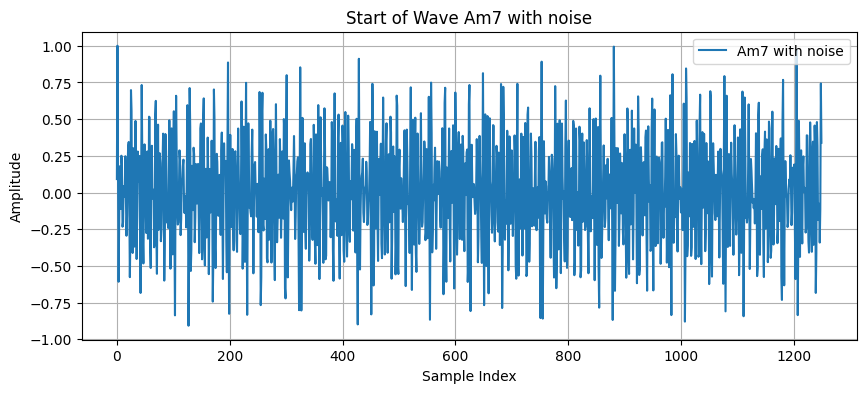

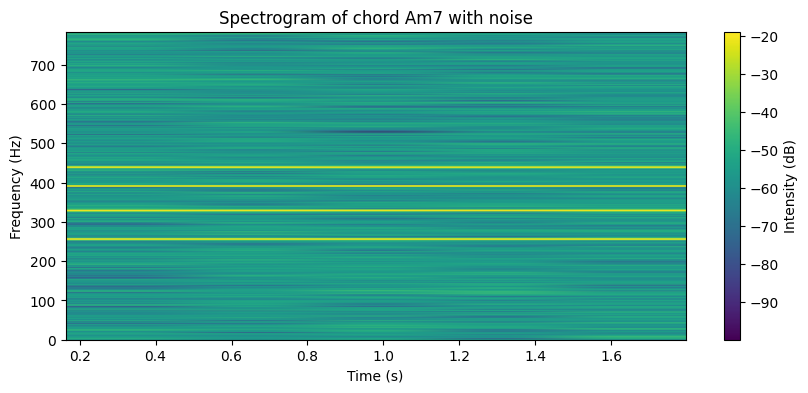

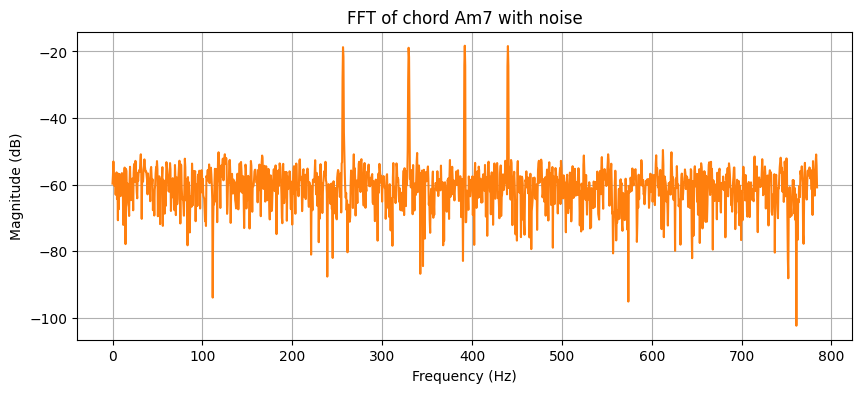

In [61]:
#generating a Am7 chord waves with noise
s_Am7_noise = s_Am7 + (np.random.rand(len(s_Am7)) - 0.5) * 0.2
s_Am7_noise /= np.max(np.abs(s_Am7_noise))  # Normalize the signal

play_signal(s_Am7_noise * 0.5, sample_rate=sample_rate)

plot_waveform(s_Am7_noise[:1250], "Am7 with noise", "Start of Wave Am7 with noise")
plot_spectrogram(s_Am7_noise, "Spectrogram of chord Am7 with noise")
plot_fft(s_Am7_noise, "FFT of chord Am7 with noise")

In [62]:
# filtering the noise
s_Am7_noise_filtered_M5 = np.convolve(h_M5, s_Am7_noise)
s_Am7_noise_filtered_m50 = np.convolve(h_m50, s_Am7_noise)
s_Am7_noise_filtered_m500 = np.convolve(h_m500, s_Am7_noise)
s_Am7_noise_filtered_m5000 = np.convolve(h_m5000, s_Am7_noise)

In [64]:
play_signal(s_Am7_noise_filtered_M5, sample_rate=sample_rate)
play_signal(s_Am7_noise_filtered_m50, sample_rate=sample_rate)
play_signal(s_Am7_noise_filtered_m500, sample_rate=sample_rate)
play_signal(s_Am7_noise_filtered_m5000, sample_rate=sample_rate)

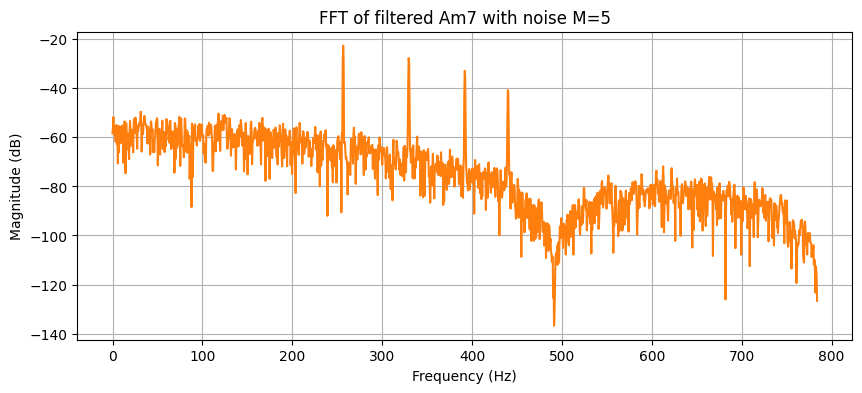

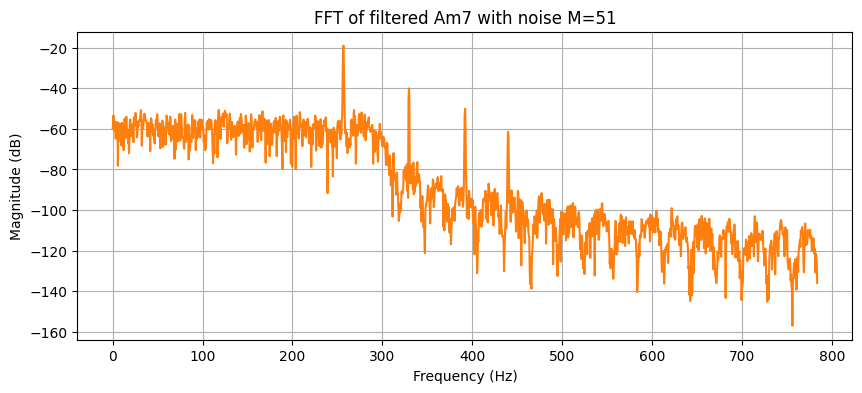

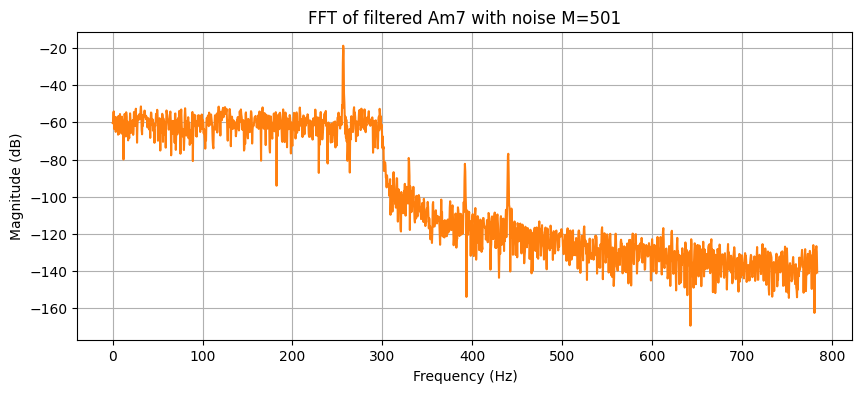

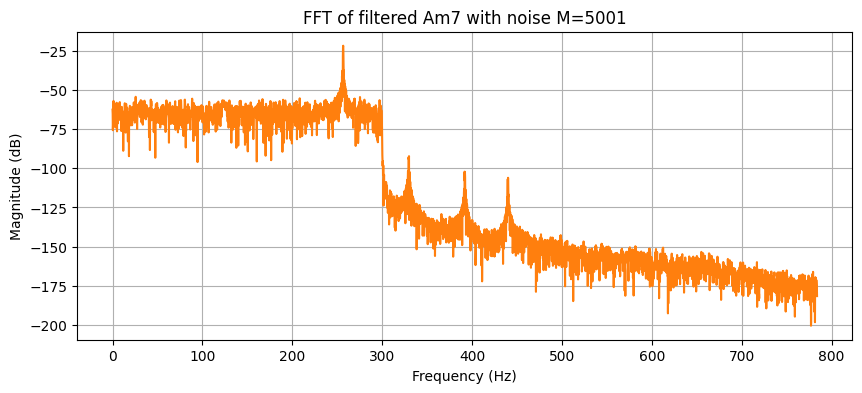

In [65]:
plot_fft(s_Am7_noise_filtered_M5, "FFT of filtered Am7 with noise M=5")
plot_fft(s_Am7_noise_filtered_m50, "FFT of filtered Am7 with noise M=51")
plot_fft(s_Am7_noise_filtered_m500, "FFT of filtered Am7 with noise M=501")
plot_fft(s_Am7_noise_filtered_m5000, "FFT of filtered Am7 with noise M=5001")


**Author:** Matheus Sinto Novaes <br>
**E-mail:** matheus.sinto@unesp.br

**Course:** Digital Speech Processing <br>
**Professor:** Dr. Eng. Rodrigo Capobianco Guido <br>
**Date:** March 17 2025
